In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [30]:
yellow=pd.read_csv('yellowtripmuestranormalizadamodificado.csv')

In [31]:
yellow.head()

,Unnamed: 0,Proveedor TPEP,Hora recogida,Hora destino,PULocationID,Distrito recogida,ID lugar llegada,Distrito llegada,Distancia viaje,Costo tarifa,Total,tolls_amount,Tipo pago,Año recogida,Mes recogida,Día recogida,Día semana recogida
0,0,2,2021-01-18 17:18:16,2021-01-18 17:23:41,144,Queens,79,Brooklyn,1.03,5.5,10.56,0.00,1,2021,1,18,Monday
1,1,2,2021-01-04 15:01:29,2021-01-04 15:14:15,107,Brooklyn,141,Queens,2.67,11.0,15.00,0.00,1,2021,1,4,Monday
2,2,1,2021-01-26 17:42:37,2021-01-26 18:15:10,132,Queens,90,Brooklyn,18.00,52.0,73.67,6.12,1,2021,1,26,Tuesday
3,3,2,2021-01-29 20:23:15,2021-01-29 20:25:47,233,Manhattan,137,Queens,0.46,4.0,9.36,0.00,1,2021,1,29,Friday
4,4,2,2021-01-14 19:50:43,2021-01-14 20:14:26,113,Queens,7,Manhattan,5.74,21.0,32.89,0.00,1,2021,1,14,Thursday


In [32]:
yellow.drop(columns=['Unnamed: 0'], inplace=True)
yellow['Hora recogida'] = pd.to_datetime(yellow['Hora recogida'])
yellow['Hora destino'] = pd.to_datetime(yellow['Hora destino'])


In [33]:
yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16895 entries, 0 to 16894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Proveedor TPEP       16895 non-null  int64         
 1   Hora recogida        16895 non-null  datetime64[ns]
 2   Hora destino         16895 non-null  datetime64[ns]
 3   PULocationID         16895 non-null  int64         
 4   Distrito recogida    16895 non-null  object        
 5   ID lugar llegada     16895 non-null  int64         
 6   Distrito llegada     16893 non-null  object        
 7   Distancia viaje      16895 non-null  float64       
 8   Costo tarifa         16895 non-null  float64       
 9   Total                16895 non-null  float64       
 10  tolls_amount         16895 non-null  float64       
 11  Tipo pago            16895 non-null  int64         
 12  Año recogida         16895 non-null  int64         
 13  Mes recogida         16895 non-

In [34]:
yellow.describe()

,Proveedor TPEP,Hora recogida,Hora destino,PULocationID,ID lugar llegada,Distancia viaje,Costo tarifa,Total,tolls_amount,Tipo pago,Año recogida,Mes recogida,Día recogida
count,16895.000000,16895,16895,16895.000000,16895.000000,16895.000000,16895.000000,16895.000000,16895.000000,16895.000000,16895.000000,16895.000000,16895.000000
mean,1.700207,2022-10-23 07:21:19.575732480,2022-10-23 07:38:21.549689088,165.392720,163.870553,3.369150,16.009180,23.444171,0.480718,1.200237,2022.340988,6.136608,15.708612
min,1.000000,2021-01-01 00:12:57,2021-01-01 00:37:38,1.000000,1.000000,0.000000,-87.000000,-88.500000,-6.940000,0.000000,2021.000000,1.000000,1.000000
25%,1.000000,2021-11-16 08:06:40,2021-11-16 08:17:16,132.000000,114.000000,1.100000,7.500000,13.200000,0.000000,1.000000,2021.000000,3.000000,8.000000
50%,2.000000,2022-10-01 01:15:49,2022-10-01 01:23:28,162.000000,162.000000,1.820000,11.400000,17.640000,0.000000,1.000000,2022.000000,6.000000,16.000000
75%,2.000000,2023-09-30 23:34:07,2023-09-30 23:42:41,234.000000,234.000000,3.400000,18.000000,25.615000,0.000000,1.000000,2023.000000,9.000000,23.000000
max,6.000000,2024-08-31 23:04:59,2024-08-31 23:10:59,265.000000,265.000000,605.280000,300.000000,301.000000,28.000000,4.000000,2024.000000,12.000000,31.000000
std,0.478405,NaN,NaN,65.252504,70.159301,6.268329,15.323378,19.326440,1.924322,0.513555,1.085941,3.361534,8.756822


In [35]:
yellow.isnull().sum

<bound method DataFrame.sum of        Proveedor TPEP  Hora recogida  Hora destino  PULocationID  \
0               False          False         False         False   
1               False          False         False         False   
2               False          False         False         False   
3               False          False         False         False   
4               False          False         False         False   
...               ...            ...           ...           ...   
16890           False          False         False         False   
16891           False          False         False         False   
16892           False          False         False         False   
16893           False          False         False         False   
16894           False          False         False         False   

       Distrito recogida  ID lugar llegada  Distrito llegada  Distancia viaje  \
0                  False             False             False           

In [36]:
yellow.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16890    False
16891    False
16892    False
16893    False
16894    False
Length: 16895, dtype: bool>

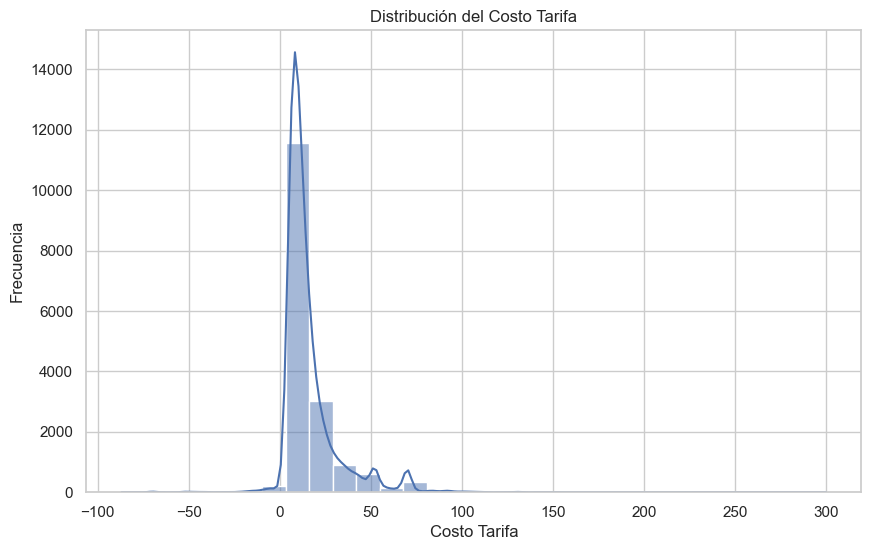

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(yellow['Costo tarifa'], bins=30, kde=True, palette='crest')
plt.title('Distribución del Costo Tarifa')
plt.xlabel('Costo Tarifa')
plt.ylabel('Frecuencia')
plt.show()


### Del gráfico anterior se concluye que: 
#### Mayoría de costos bajos: 
La mayoría de los viajes tienen un costo de tarifa relativamente bajo.
#### Algunos viajes muy costosos: 
Existe un grupo de viajes con costos de tarifa significativamente más altos que el promedio.
#### Posibles errores en los datos: 
Los valores negativos podrían indicar errores en la recopilación de datos.

In [14]:
yellow['Total'].value_counts()

Total
 16.80     174
 13.80     173
 10.80     170
 11.30     166
 15.96     165
          ... 
 118.98      1
 35.25       1
-14.70       1
 96.06       1
 21.14       1
Name: count, Length: 2560, dtype: int64

Identificación de outliers en el precio.

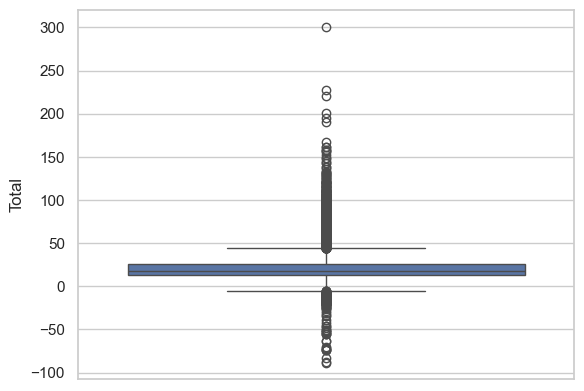

In [15]:
sns.boxplot(yellow['Total']);

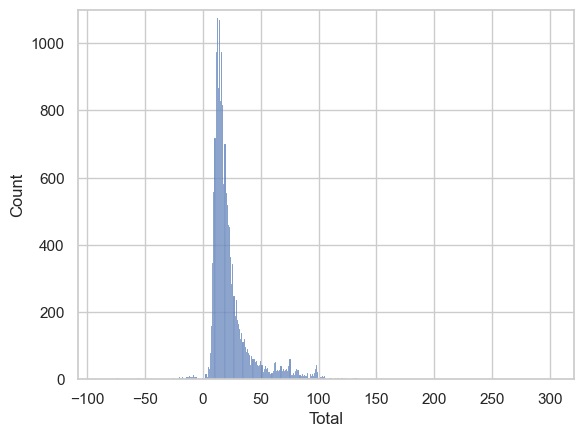

In [16]:
sns.histplot(yellow['Total'], palette='crest')
plt.ylim(0,1100);

Descripción estadística de los precios del dataframe

In [17]:
yellow['Costo tarifa'].describe()

count    16895.000000
mean        16.009180
std         15.323378
min        -87.000000
25%          7.500000
50%         11.400000
75%         18.000000
max        300.000000
Name: Costo tarifa, dtype: float64

In [19]:
max_price = yellow['Costo tarifa'].max()                 
median_price = np.median(yellow['Costo tarifa'])           
q1 = np.quantile(yellow['Costo tarifa'], q=0.25)         
q3 = np.quantile(yellow['Costo tarifa'], q=0.75)         
iqr = q3 - q1                                       
lim_sup = q3 + 1.5*iqr  

Precio máximo y trayecto asociado

In [20]:
precio_max_fila = yellow.loc[yellow['Costo tarifa'].idxmax()]
distancia = precio_max_fila['Distancia viaje']
print(f'El precio máximo es {max_price} y corresponde al trayecto de {distancia} millas')

El precio máximo es 300.0 y corresponde al trayecto de 0.0 millas


Identificación de outliers

In [21]:
outliers = yellow[yellow['Costo tarifa'] > lim_sup][['Distancia viaje','Costo tarifa']]
print('Los viajes con precio outlier son:\n')
for idx, row in outliers.iterrows():
    print(f"Una distancia de {row['Distancia viaje']} millas hasta con un costo de {row['Costo tarifa']}")

Los viajes con precio outlier son:

Una distancia de 18.0 millas hasta con un costo de 52.0
Una distancia de 18.07 millas hasta con un costo de 52.0
Una distancia de 16.6 millas hasta con un costo de 51.0
Una distancia de 14.7 millas hasta con un costo de 39.0
Una distancia de 11.91 millas hasta con un costo de 37.5
Una distancia de 12.8 millas hasta con un costo de 35.0
Una distancia de 13.71 millas hasta con un costo de 41.5
Una distancia de 0.0 millas hasta con un costo de 38.2
Una distancia de 8.01 millas hasta con un costo de 35.66
Una distancia de 14.45 millas hasta con un costo de 54.5
Una distancia de 13.07 millas hasta con un costo de 40.5
Una distancia de 0.0 millas hasta con un costo de 52.0
Una distancia de 17.54 millas hasta con un costo de 64.5
Una distancia de 15.21 millas hasta con un costo de 41.0
Una distancia de 14.82 millas hasta con un costo de 41.5
Una distancia de 17.14 millas hasta con un costo de 52.0
Una distancia de 19.18 millas hasta con un costo de 52.0
Una

In [22]:
outliers.count()

Distancia viaje    1665
Costo tarifa       1665
dtype: int64

Se grafican los outliers relacionados con la tarifa

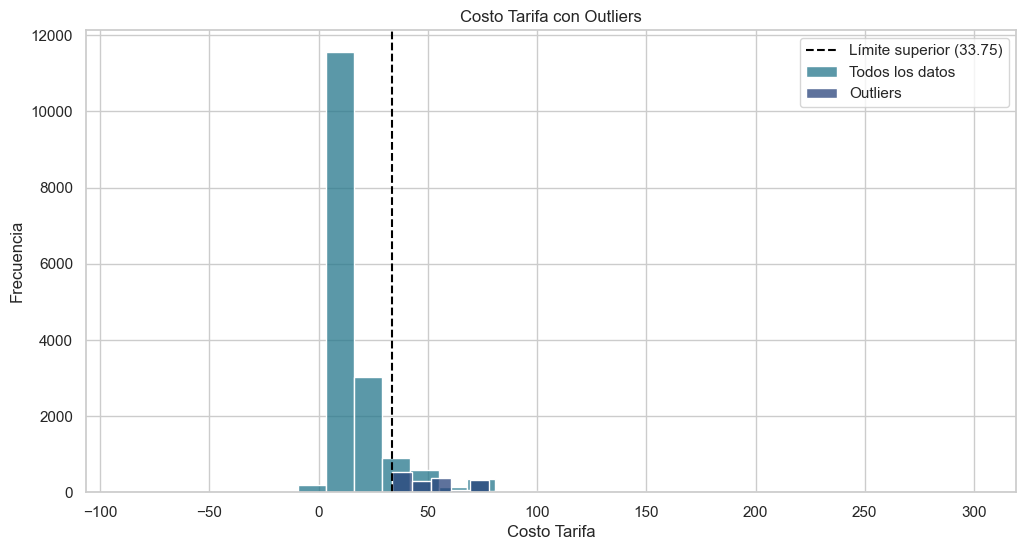

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(yellow['Costo tarifa'], bins=30, kde=False, color=sns.color_palette('crest', as_cmap=True)(0.6), label='Todos los datos')

# Crear un histograma de los outliers sobre el mismo gráfico
sns.histplot(outliers['Costo tarifa'], bins=30, kde=False, color=sns.color_palette('crest', as_cmap=True)(0.9), label='Outliers')

# Añadir detalles al gráfico
plt.axvline(x=lim_sup, color='black', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')
plt.title('Costo Tarifa con Outliers')
plt.xlabel('Costo Tarifa')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### El gráfico evidencia que:
#### Distribución: 
La mayoría de los costos de tarifa se concentran entre 0 y 50. Esto significa que la mayoría de los viajes tienen un costo relativamente bajo.
#### Valores atípicos:
La línea vertical negra marca un límite a partir del cual se consideran los datos como "outliers". Al parecer, hay una cantidad significativa de viajes con costos de tarifa muy altos, por encima de este límite. Estos valores atípicos podrían corresponder a viajes especiales, errores en los datos o situaciones excepcionales.
#### Valores negativos: 
También se observan algunos viajes con costos de tarifa negativos. Esto podría indicar errores en los datos, reembolsos o algún tipo de descuento.

Se grafica la distribución de las tarifas sin outliers

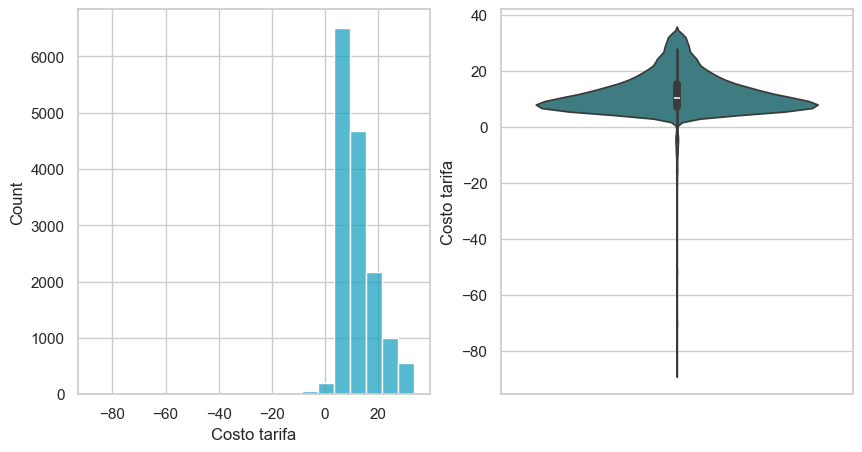

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))

ax1 = sns.histplot(yellow[yellow['Costo tarifa'] < lim_sup]['Costo tarifa'], bins=20, ax= ax1, color='#1FA2BF')
ax2 = sns.violinplot(yellow[yellow['Costo tarifa'] < lim_sup]['Costo tarifa'], ax= ax2, palette='crest')

### Del gráfico es posible constatar que:
#### Distribución sesgada: 
Los datos están sesgados hacia la izquierda, lo que significa que hay una mayor concentración de valores bajos (costos de tarifa cercanos a 0) en comparación con los valores altos.
#### Presencia de valores atípicos: 
Existen algunos valores atípicos, especialmente en la parte negativa de la distribución. Estos valores podrían ser errores en los datos o representar situaciones especiales.
#### Mayoría de costos bajos: 
La mayoría de los viajes tienen un costo de tarifa relativamente bajo.

Diagrama de dispersión.

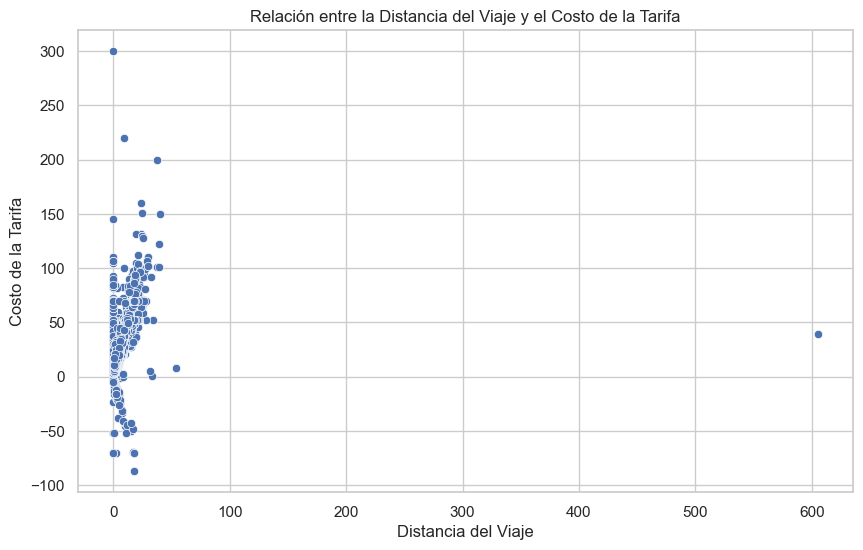

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yellow, x='Distancia viaje', y='Costo tarifa', palette='crest')
plt.title('Relación entre la Distancia del Viaje y el Costo de la Tarifa')
plt.xlabel('Distancia del Viaje')
plt.ylabel('Costo de la Tarifa');

### Al observar el gráfico, podemos notar lo siguiente:
#### Tendencia general: 
Existe una tendencia general a que el costo de la tarifa aumente a medida que aumenta la distancia del viaje. Esto es lógico, ya que generalmente los viajes más largos tienen un costo mayor.
#### Dispersión: 
Sin embargo, también hay una gran dispersión de los datos. Esto significa que no todos los viajes siguen exactamente esta tendencia. Hay viajes cortos con costos altos y viajes largos con costos bajos.
#### Valores atípicos: 
Se observan algunos puntos que se alejan de la tendencia general. Estos puntos podrían corresponder a viajes con características especiales (por ejemplo, viajes en hora punta, viajes con múltiples paradas, etc.) o a errores en los datos.

Matriz de correlación

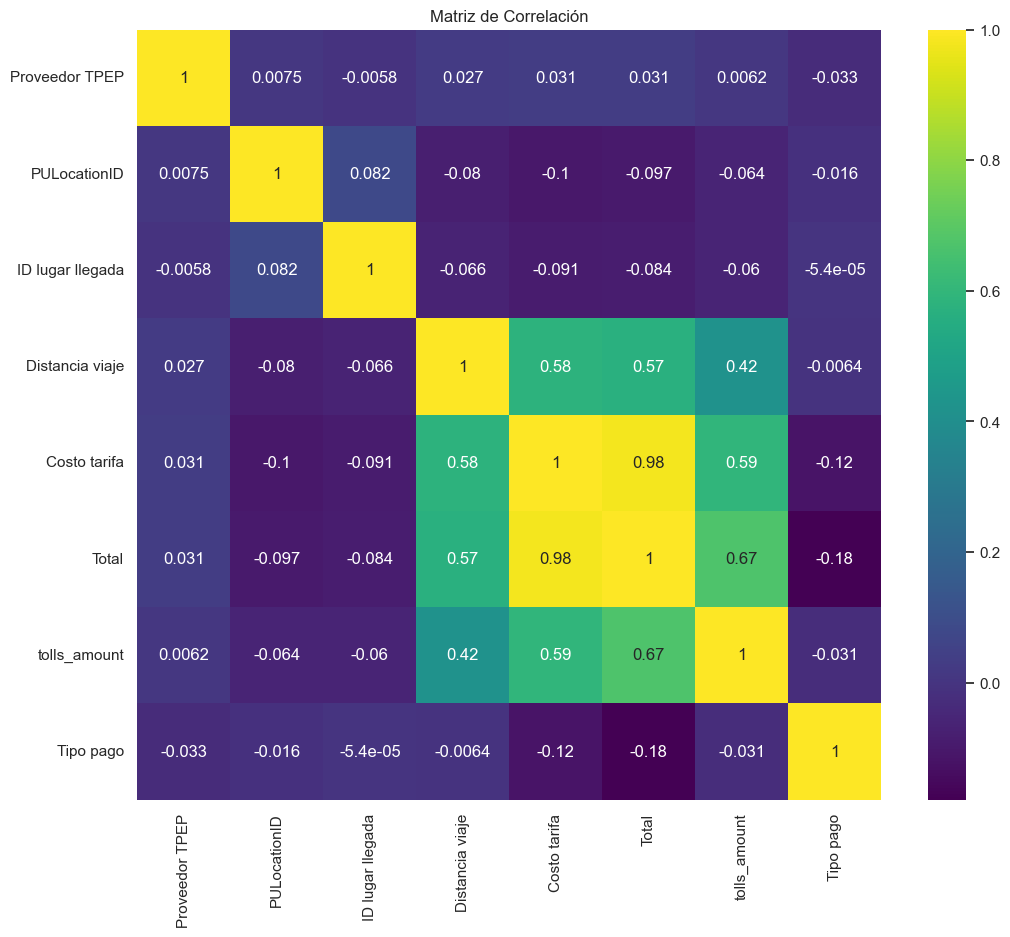

In [26]:
numeric_columns = yellow.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriz de Correlación');

### Interpretación de los resultados.
#### Alta correlación entre costo de tarifa, total y distancia de viaje: 
Las variables "Costo tarifa", "Total" y "Distancia viaje" muestran una correlación positiva muy fuerte entre sí. Esto es lógico, ya que generalmente a mayor distancia, mayor será el costo total del viaje, y este costo total estará muy relacionado con el costo base de la tarifa.
#### Otras correlaciones: 
También podemos observar otras correlaciones interesantes, como la relación entre "Total" y "tolls_amount" (importe de peajes). Esta correlación positiva indica que a mayor costo total del viaje, es más probable que se hayan pagado más peajes.
#### Correlaciones débiles o nulas: 
Hay varias variables que presentan correlaciones débiles o nulas con el resto, como "Unnamed: 0", "Proveedor TPEP" y "PULocationID". Esto sugiere que estas variables podrían no estar muy relacionadas con las otras variables del conjunto de datos.

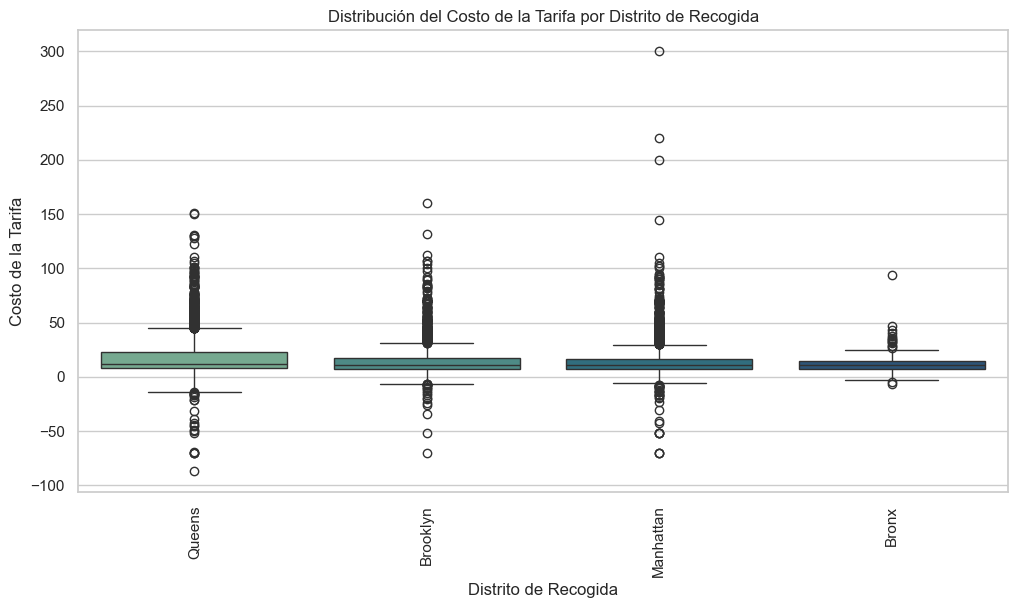

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=yellow, x='Distrito recogida', y='Costo tarifa', palette='crest')
plt.title('Distribución del Costo de la Tarifa por Distrito de Recogida')
plt.xlabel('Distrito de Recogida')
plt.ylabel('Costo de la Tarifa')
plt.xticks(rotation=90)
plt.show()

Cada caja representa un distrito (Queens, Brooklyn, Manhattan y Bronx), y dentro de cada caja se resumen varios aspectos del costo de la tarifa.
### Interpretación de los resultados:
Al observar el gráfico, podemos extraer las siguientes conclusiones:
#### Variabilidad en los costos: 
Los costos de las tarifas varían considerablemente entre los diferentes distritos.
#### Manhattan presenta los costos más altos:
La caja de Manhattan se encuentra en una posición más elevada que las de los otros distritos, lo que indica que, en promedio, las tarifas en Manhattan son más altas.
#### Queens presenta los costos más bajos: 
La caja de Queens se encuentra en una posición más baja, lo que sugiere que las tarifas en Queens tienden a ser más económicas.
#### Presencia de valores atípicos: 
En todos los distritos se observan valores atípicos, tanto por encima como por debajo del rango intercuartílico. Estos valores atípicos podrían corresponder a tarifas especiales, errores en los datos o situaciones particulares que hacen que el costo de la tarifa se desvíe significativamente del promedio.

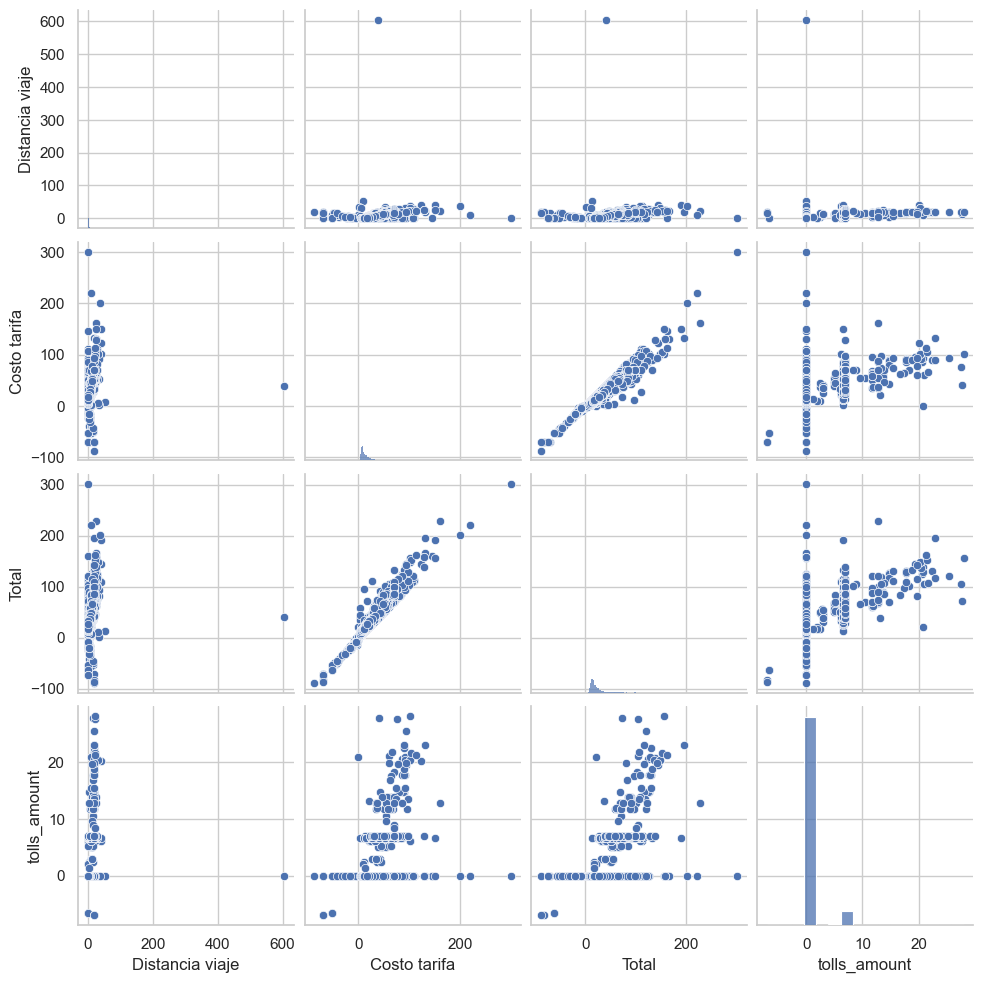

In [28]:
sns.pairplot(yellow[['Distancia viaje', 'Costo tarifa', 'Total', 'tolls_amount']], palette='crest')
plt.show()

### Interpretando las relaciones:

#### Diagonal: 
Las celdas de la diagonal principal muestran la distribución de cada variable individualmente. En este caso, vemos que la mayoría de los viajes tienen una distancia y un costo de tarifa relativamente bajos, mientras que los importes de peaje tienden a ser menores y con algunos valores atípicos.
#### Celdas fuera de la diagonal: 
Estas celdas nos muestran cómo se relacionan dos variables diferentes. Por ejemplo:
##### Distancia del viaje vs. Costo de la tarifa: 
Observamos una tendencia clara: a mayor distancia, mayor costo de la tarifa. Esto es lógico, ya que generalmente los viajes más largos tienen un costo base más elevado.
##### Costo de la tarifa vs. Total: 
También vemos una relación positiva fuerte entre estas dos variables. Esto indica que el costo total del viaje está muy influenciado por el costo base de la tarifa.
#### Distancia del viaje vs. Importe de peajes: 
Aquí la relación es menos clara, pero parece haber una ligera tendencia a que viajes más largos tengan peajes más altos, aunque con mucha variabilidad.

### Basándonos en este gráfico, podemos inferir lo siguiente:
El costo total de un viaje está fuertemente determinado por la distancia recorrida y el costo base de la tarifa.
Los peajes representan una parte relativamente pequeña del costo total del viaje, aunque pueden variar significativamente dependiendo de la ruta.
Existen algunos viajes con distancias y costos muy bajos, lo que podría corresponder a viajes cortos dentro de una misma ciudad o zona.

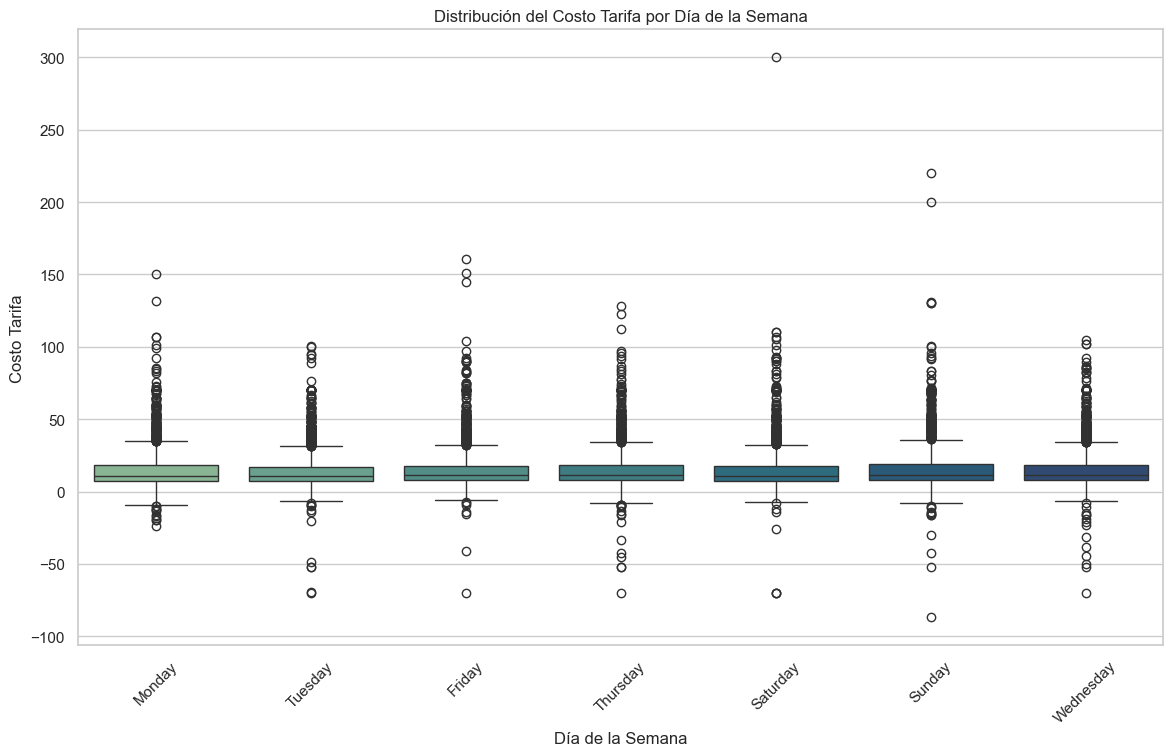

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Día semana recogida', y='Costo tarifa', data=yellow, palette='crest')
plt.title('Distribución del Costo Tarifa por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Costo Tarifa')
plt.xticks(rotation=45)
plt.show()


### Del gráfico es posible inferir que: 
Los costos promedio de las tarifas son bastante similares a lo largo de la semana.
Existen valores atípicos que podrían corresponder a situaciones especiales o errores en los datos.
No hay una tendencia clara de aumento o disminución de los costos a lo largo de la semana.

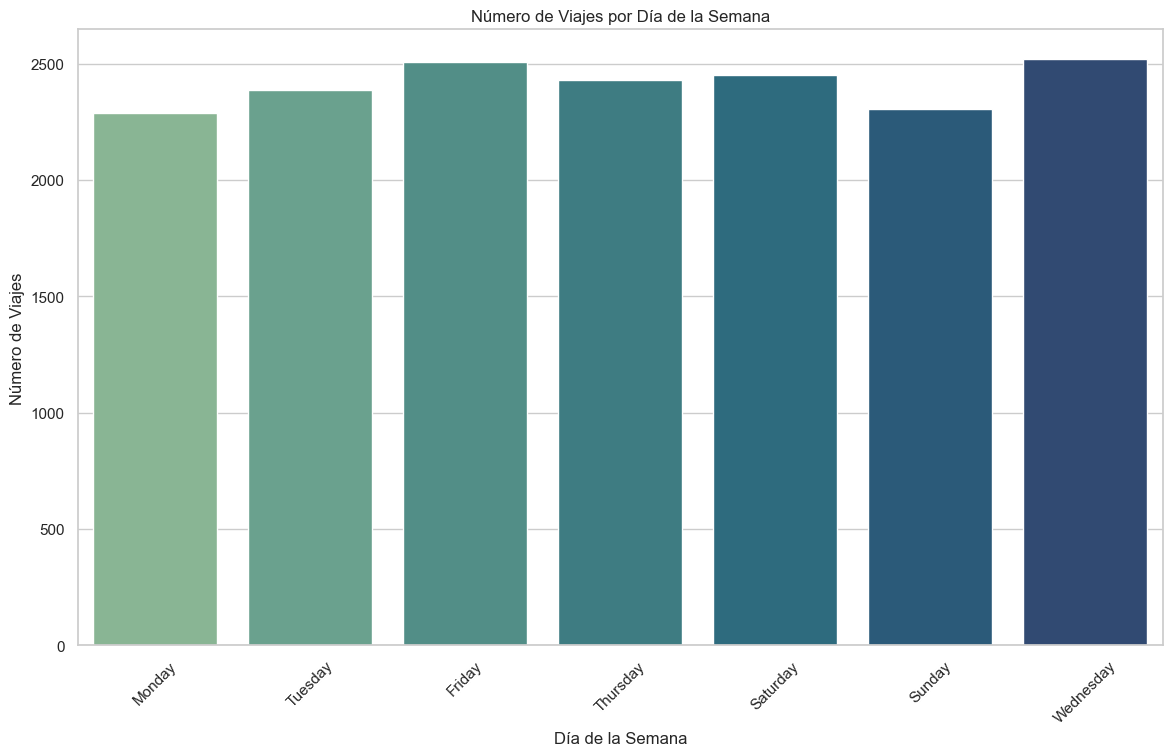

In [39]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Día semana recogida', data=yellow, palette='crest')
plt.title('Número de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()


### Del gráfico podemos inferir que: 
#### Días con mayor demanda:
##### Miércoles: 
Es el día que registra el mayor número de viajes, superando a todos los demás días de la semana. Esto indica que los miércoles son, en promedio, los días más activos en términos de movimiento o actividad relacionada con los viajes.
###### Viernes y Jueves: 
Le siguen en popularidad los viernes y jueves, con un número de viajes considerablemente alto.
#### Días con menor demanda:
##### Lunes: 
Contrario a lo que podría esperarse, el lunes presenta el menor número de viajes. Esto podría sugerir que muchas personas aprovechan este día para descansar o realizar actividades que no requieren desplazamientos.
##### Sábado: 
El sábado también muestra un número de viajes relativamente bajo, lo que corrobora la tendencia de menor actividad durante los fines de semana.
#### Patrones semanales:
##### Media semana: 
La mitad de la semana, desde el martes hasta el jueves, muestra los números más altos de viajes, lo que sugiere que la mayor parte de la actividad se concentra en estos días.
##### Fin de semana: 
Tanto el lunes como el sábado presentan los números más bajos, indicando una disminución significativa en la actividad durante el fin de semana.

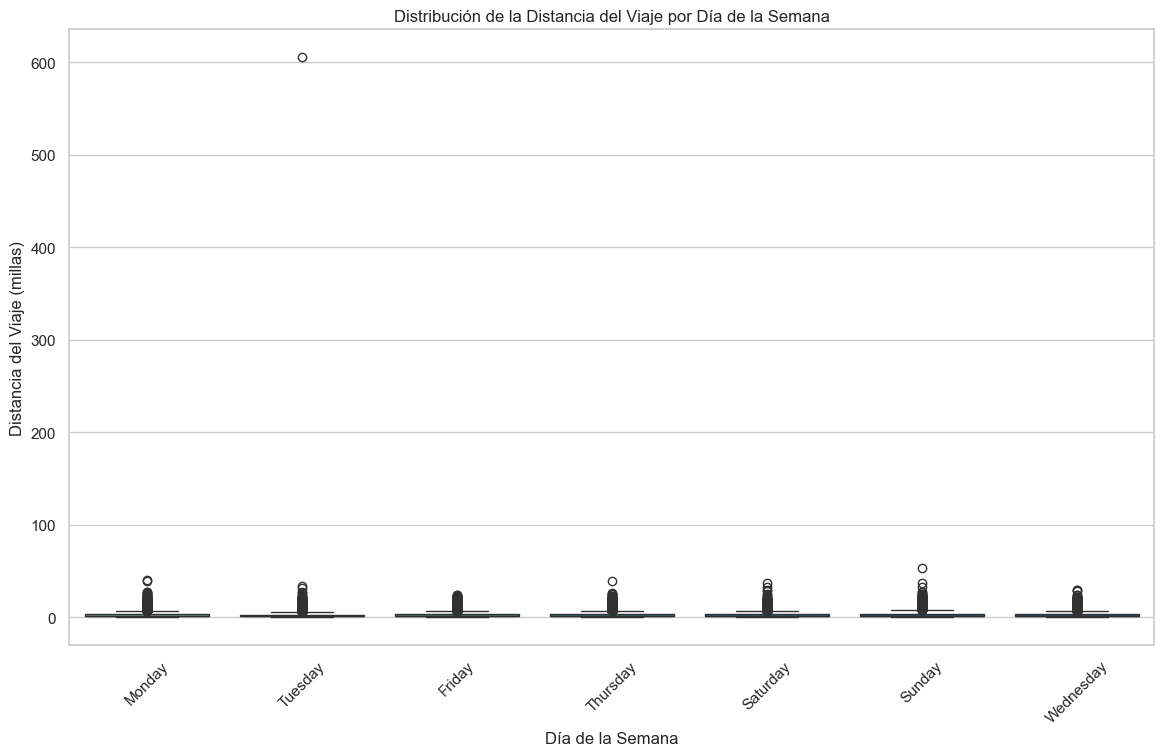

In [40]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Día semana recogida', y='Distancia viaje', data=yellow, palette='crest')
plt.title('Distribución de la Distancia del Viaje por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Distancia del Viaje (millas)')
plt.xticks(rotation=45)
plt.show()


### Del gráfico podemos inferir que: 
#### Baja variabilidad en las distancias:
##### Concentración en distancias cortas: 
La mayoría de las distancias recorridas se concentran en valores muy bajos, cercanos a cero, para todos los días de la semana. Esto sugiere que la mayor parte de los viajes son relativamente cortos.
##### Pocos outliers: 
La presencia de pocos outliers (puntos fuera de los bigotes) indica que hay pocos viajes extremadamente largos en comparación con la mayoría de los viajes.
#### Similaridad entre los días:
##### Patrón consistente: 
Las cajas y los bigotes para todos los días de la semana son muy similares, lo que sugiere que no hay diferencias significativas en las distancias recorridas entre un día y otro.

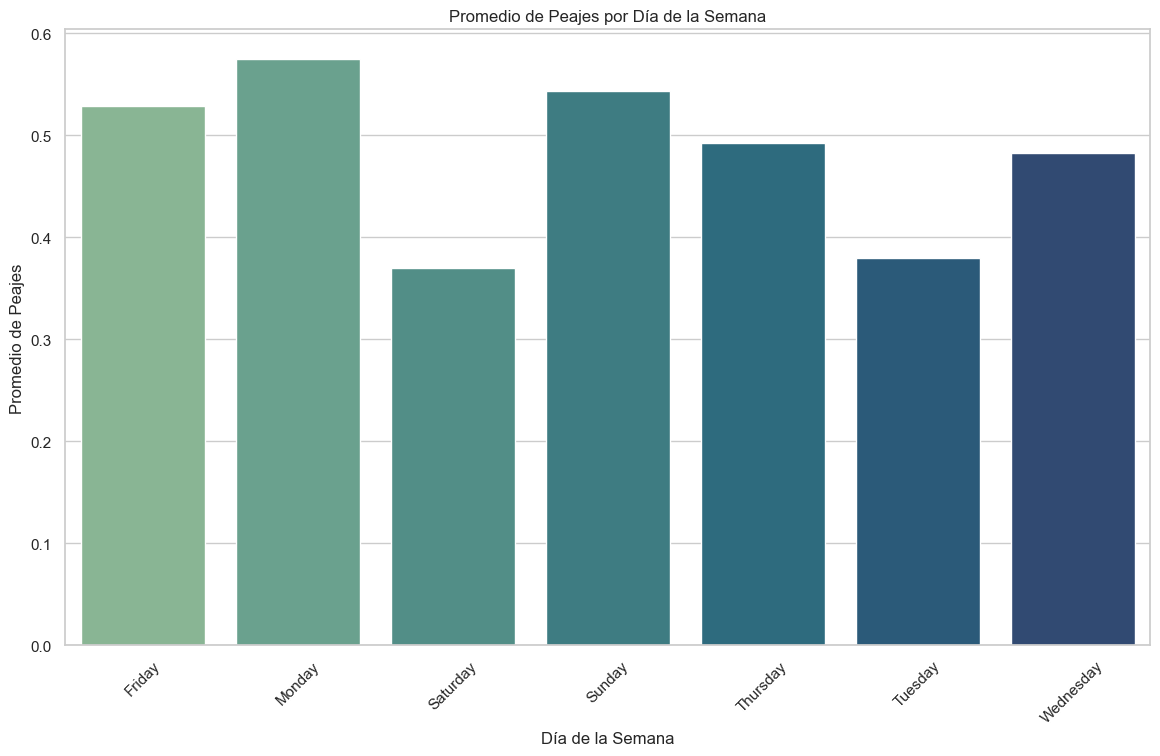

In [41]:
peajes_por_dia = yellow.groupby('Día semana recogida')['tolls_amount'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Día semana recogida', y='tolls_amount', data=peajes_por_dia, palette='crest')
plt.title('Promedio de Peajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Peajes')
plt.xticks(rotation=45)
plt.show()


### Del gráfico podemos inferir que: 
#### Días con mayor promedio de peajes:
##### Lunes: 
Es el día que registra el promedio de peajes más alto, lo que sugiere que los usuarios de la vía en cuestión tienden a pagar más peajes los lunes.
##### Viernes: 
Le sigue en promedio de peajes el viernes, indicando también una alta frecuencia de pagos en este día.
#### Días con menor promedio de peajes:
##### Sábado y Domingo: 
Ambos días presentan los promedios de peajes más bajos, lo que podría indicar una menor actividad en la vía durante los fines de semana.
#### Patrones semanales:
##### Inicio y final de semana: 
Tanto los lunes como los viernes, que suelen ser el inicio y el final de la semana laboral, presentan promedios de peajes elevados. Esto podría indicar que muchos usuarios realizan viajes relacionados con el trabajo durante estos días.
##### Medio de semana: 
Los días de en medio de la semana, como miércoles y domingo, muestran promedios de peajes más bajos, lo que podría sugerir una menor actividad relacionada con el trabajo o los estudios.

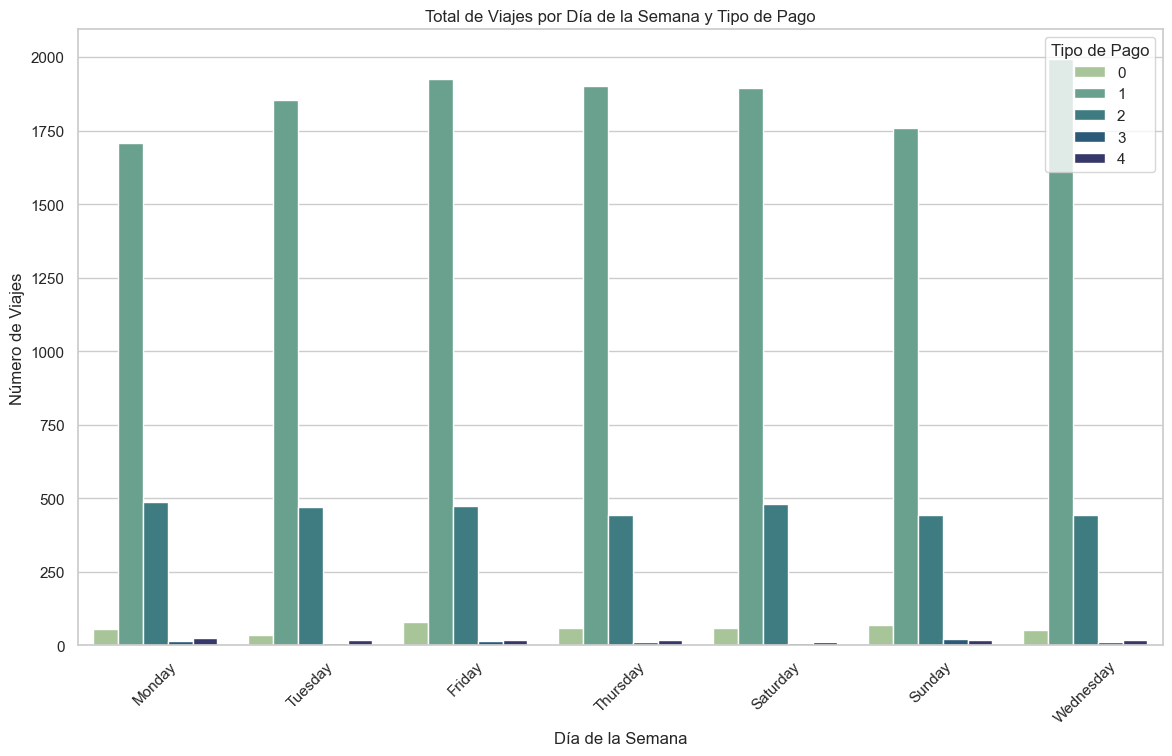

In [42]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Día semana recogida', hue='Tipo pago', data=yellow, palette='crest')
plt.title('Total de Viajes por Día de la Semana y Tipo de Pago')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Pago')
plt.show()
